<div style="background-color: #E8B86D; padding: 25px; border-radius: 10px;">
  <h1 style="color: #173B45;"><strong>Spotify Music Data Analysis</center></strong></h1>
</div>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<div style="background-color: #E8B86D; padding: 25px; border-radius: 10px;">
  <h1 style="color: #173B45;"><strong><center>Loading & Checking Dataset</center></strong></h1>
</div>

In [19]:
df = pd.read_csv(r"D:\Python\SpotifyFeatures.csv")
df.head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [4]:
# Check the shape and data types of the dataset to understand structure
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

Dataset Shape: (232725, 18)

Data Types:
 genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object


In [5]:
# Checking for null values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64


In [6]:
# Check how many unique genres are present and the top 10 most common
print("\nUnique Genres:", df['genre'].nunique())
print(df['genre'].value_counts().head(10))


Unique Genres: 27
genre
Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Name: count, dtype: int64


In [7]:
# Most populor artists
artist_stats = df.groupby("artist_name").agg({'popularity': ['mean', 'count']})
artist_stats.columns = ['avg_popularity', 'song_count']
top_artist = artist_stats[artist_stats['song_count'] >= 20].sort_values('avg_popularity', ascending=False).head(10)
top_artist


,avg_popularity,song_count
artist_name,,
Billie Eilish,80.500000,20
Post Malone,76.035294,85
Juice WRLD,75.500000,40
Offset,74.655172,58
Khalid,74.437500,32
XXXTENTACION,73.000000,106
Metro Boomin,73.000000,41
6ix9ine,72.923077,26
Ed Sheeran,72.851064,47


In [8]:
#Top 10 Popular songs
top_10_popular_songs = df.nlargest(10, 'popularity')[['track_name', 'artist_name', 'popularity', 'genre']]
top_10_popular_songs

,track_name,artist_name,popularity,genre
9027,7 rings,Ariana Grande,100,Dance
107804,7 rings,Ariana Grande,100,Pop
9026,"break up with your girlfriend, i'm bored",Ariana Grande,99,Dance
86951,Wow.,Post Malone,99,Rap
107802,"break up with your girlfriend, i'm bored",Ariana Grande,99,Pop
107803,Wow.,Post Malone,99,Pop
66643,Con Calma,Daddy Yankee,98,Hip-Hop
107909,Con Calma,Daddy Yankee,98,Pop
138918,Con Calma,Daddy Yankee,98,Reggaeton
9028,Without Me,Halsey,97,Dance


<div style="background-color: #E8B86D; padding: 25px; border-radius: 10px;">
  <h1 style="color: #173B45;"><strong><center>Top Artists By Number of Songs</center></strong></h1>
</div

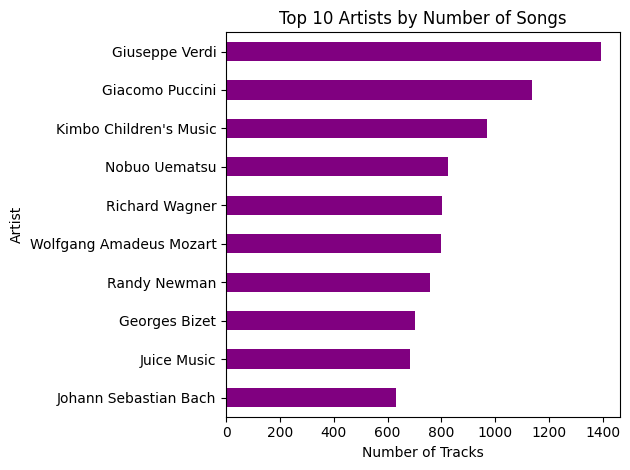

In [9]:
# Identify the most featured artists in the dataset
top_artists = df['artist_name'].value_counts().head(10)
top_artists.plot(kind='barh', color='purple')
plt.title('Top 10 Artists by Number of Songs')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

<div style="background-color: #E8B86D; padding: 25px; border-radius: 10px;">
  <h1 style="color: #173B45;"><strong><center>Avg Feature Values by Genre</center></strong></h1>
</div

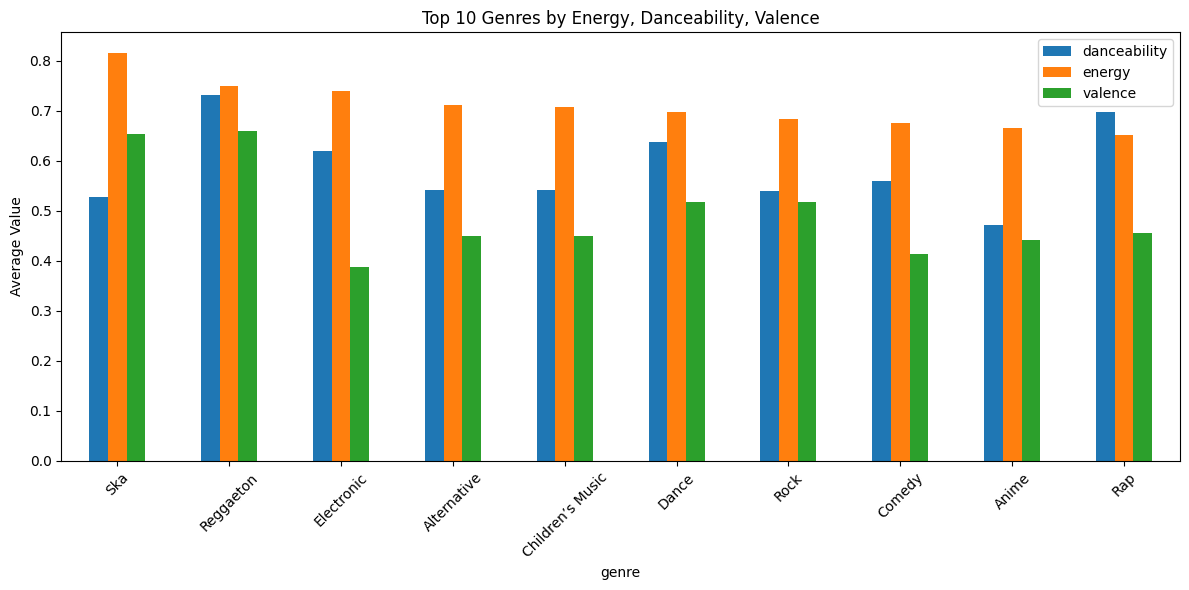

In [10]:
# Compare average danceability, energy, and valence across top genres
genre_means = df.groupby('genre')[['danceability', 'energy', 'valence']].mean().sort_values(by='energy', ascending=False).head(10)
genre_means.plot(kind='bar', figsize=(12,6))
plt.title('Top 10 Genres by Energy, Danceability, Valence')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<div style="background-color: #E8B86D; padding: 25px; border-radius: 10px;">
  <h1 style="color: #173B45;"><strong><center>Energy vs Loudness<center></strong></h1>
</div

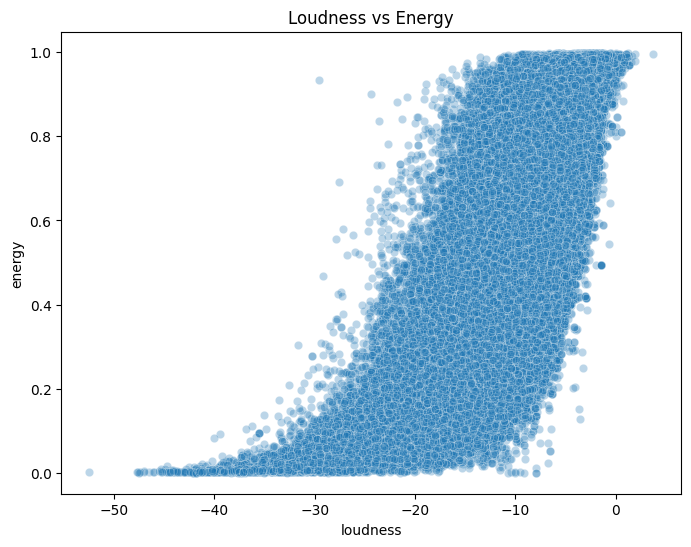

In [11]:
# Analyze the relationship between energy and loudness of tracks
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='loudness', y='energy', alpha=0.3)
plt.title('Loudness vs Energy')
plt.show()

<div style="background-color: #E8B86D; padding: 25px; border-radius: 10px;">
  <h1 style="color: #173B45;"><strong><center>Track Duration</center></strong></h1>
</div

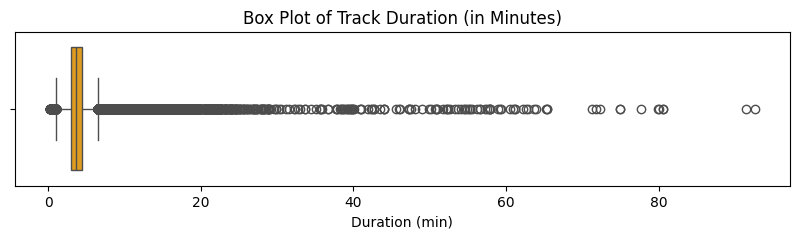

In [23]:
# Convert duration to minutes and plot the distribution
plt.figure(figsize=(10, 2))
df['duration_min'] = df['duration_ms'] / 60000
sns.boxplot(x=df['duration_min'], color='orange')
plt.title('Box Plot of Track Duration (in Minutes)')
plt.xlabel('Duration (min)')
plt.show()

<div style="background-color: #E8B86D; padding: 25px; border-radius: 10px;">
  <h1 style="color: #173B45;"><strong><center>Distribution of Track Popularity</center></strong></h1>
</div

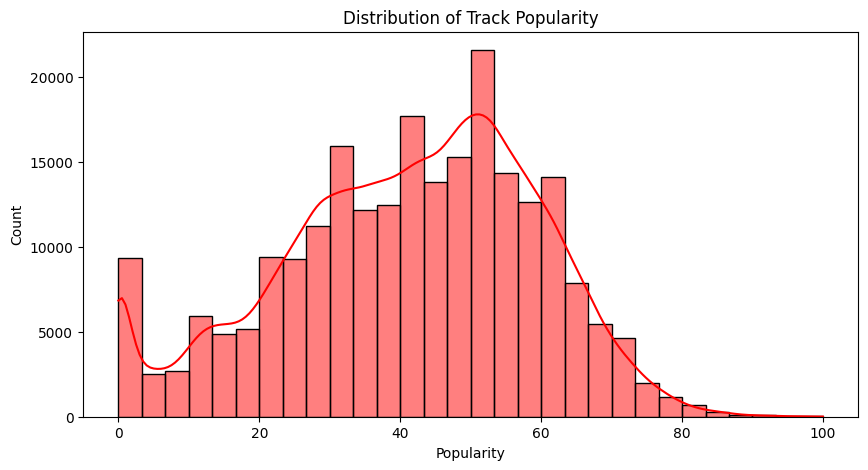

In [13]:
# Understand how popularity is distributed across tracks
plt.figure(figsize=(10, 5))
sns.histplot(df['popularity'], bins=30, kde=True, color='red')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()


<div style="background-color: #E8B86D; padding: 25px; border-radius: 10px;">
  <h1 style="color: #173B45;"><strong><center>Business Recommendations</center></strong></h1>
</div


1. Focus on High-Energy Genres: Genres like EDM and Dance have high energy and valence scores. Promote more music in these styles.
2. Boost Danceability: Tracks with higher danceability tend to perform better. Encourage artists to target this trait.
3. Artist Partnerships: Top contributing artists could be given preferential promotion or playlisting.
4. Short and Catchy Tracks: Most tracks are between 2.5–4 minutes. Encourage optimal duration for commercial success.
5. Popularity Drivers: Since popularity doesn’t correlate strongly with musical features, Spotify should continue investing in curation, marketing, and personalized playlists to drive engagement.
